# Exploratory Data Analysis (EDA)

This process begins by importing the necessary libraries, including pandas for data manipulation and visualization libraries like matplotlib, seaborn, and plotly. The dataset, presumably containing mushroom data, is read into a DataFrame. 

The initial steps involve examining the structure of the data, including data types, unique values, missing values, and descriptive statistics. Visualizations such as pie charts and bar charts are utilized to illustrate class distribution and relationships between variables.

Correlation matrices, chi-square tests, and further visualizations are conducted to analyze associations and patterns within the data. Specific groups of variables are examined through count plots to understand their distributions and relationships with the target variable 'class'. 

These visualizations include stacked bar plots, heatmaps, and individual count plots for various features like cap color, gill size, odor, bruises, etc. The EDA process is crucial for gaining insights into the dataset, identifying potential patterns, and informing subsequent steps in data preprocessing and modeling.

In [1]:
import pandas as pd


# read dataset file path
file_path = r'C:\Users\MYPC\Desktop\02_mushroom_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2                   smooth                  white                  white   
3                   smooth                  white                  white   
4                   smooth                  white                  white   

  veil-type veil-color ring-number   ring-type spore-print-color population  \
0   partial      white         one     pendant             black  scattered   
1   partial      white         one     pendant             brown   numerous   
2   partial      white         one     pendant             brown   numerous   
3   partial      white         one     pendant             black  scattered   
4   partial      white         one  evanescent             brown   abundant   

   habitat  
0    urban  
1  grasses  
2  meadows  
3    urban  
4  grasses  

[5 rows x 23 columns]

There are missing values in habitat column.

In [2]:
# Display DataFrame information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  


This step involves:

Identifying columns based on their data types: integers, floats, or objects.
Checking each numeric column (integers and floats) for non-numeric values.
Verifying that object columns contain only object (string) values.
This ensures data consistency and prepares the DataFrame for analysis by handling any potential data type mismatches or anomalies.

In [3]:
import pandas as pd


# List of columns with integer data type
int_columns = df.select_dtypes(include='int').columns

# List of columns with float data type
float_columns = df.select_dtypes(include='float').columns

# List of columns with object data type
object_columns = df.select_dtypes(include='object').columns

# Check integer columns for non-numeric values
for column in int_columns:
    try:
        pd.to_numeric(df[column], errors='raise')
    except ValueError as e:
        print(f"Column '{column}' has non-numeric values: {e}")

# Check float columns for non-numeric values
for column in float_columns:
    try:
        pd.to_numeric(df[column], errors='raise')
    except ValueError as e:
        print(f"Column '{column}' has non-numeric values: {e}")
        
# Check object columns for non-object values
for column in object_columns:
    if not pd.api.types.is_object_dtype(df[column]):
        print(f"Column '{column}' has non-object values.")


This step prints the count of unique values for each column in the DataFrame (df). It then iterates through each column, printing the column name along with its unique values. This provides a quick overview of the diversity and distribution of values within each column, aiding in understanding the dataset's characteristics.

In [4]:
print ("\nUnique values :  \n",df.nunique())
# Print unique values for each column
for column in df.columns:
    print(f"{column} unique values:\n{df[column].unique()}\n")



Unique values :  
 class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      6
dtype: int64
class unique values:
['poisonous' 'edible']

cap-shape unique values:
['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']

cap-surface unique values:
['smooth' 'scaly' 'fibrous' 'grooves']

cap-color unique values:
['brown' 'yellow' 'white' 'gray' 'red

In [5]:
df.shape

(8124, 23)

In [6]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

In [8]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

In [9]:
# Generate descriptive statistics for the DataFrame
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count     8124      8124        8124      8124    8124  8124            8124   
unique       2         6           4        10       2     9               2   
top     edible    convex       scaly     brown      no  none            free   
freq      4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top           close     broad       buff  ...                   smooth   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                     white                  white   partial      white   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    7932  
unique           3         5                 9          6       6  
top            one   pendant             white    several   woods  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [10]:
import plotly.graph_objects as go


count = df["class"].value_counts()

# Create a pie chart
labels = ['Edible', 'Poisonous']
sizes = [count['edible'], count['poisonous']]
colors = ['lightcoral', 'lightskyblue']
# explode = (0.1, 0)  # explode the 'Poisonous' slice for emphasis

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, textinfo='label+percent', marker=dict(colors=colors))])
fig.update_layout(title='Mushroom Class Distribution')

# Add annotations
annotation_edible = f'Edible: {count["edible"]} rows'
annotation_poisonous = f'Poisonous: {count["poisonous"]} rows'

fig.add_annotation(text=annotation_edible, x=0.5, y=0.5, font=dict(size=12, color='black'), showarrow=False)
fig.add_annotation(text=annotation_poisonous, x=0.5, y=-0.5, font=dict(size=12, color='black'), showarrow=False)

fig.show()


In [12]:
import plotly.graph_objects as go

# Perform cross-tabulation
cross_tab = pd.crosstab(df['class'], df['habitat'])

# Plot the cross-tabulation results in a bar chart
fig = go.Figure()

for habitat in cross_tab.columns:
    fig.add_trace(go.Bar(x=cross_tab.index, y=cross_tab[habitat], name=habitat))

fig.update_layout(title='Edibility of Mushrooms by Habitat',
                  xaxis_title='Edibility',
                  yaxis_title='Count',
                  xaxis=dict(tickangle=45),
                  barmode='stack')

fig.show()


In [18]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

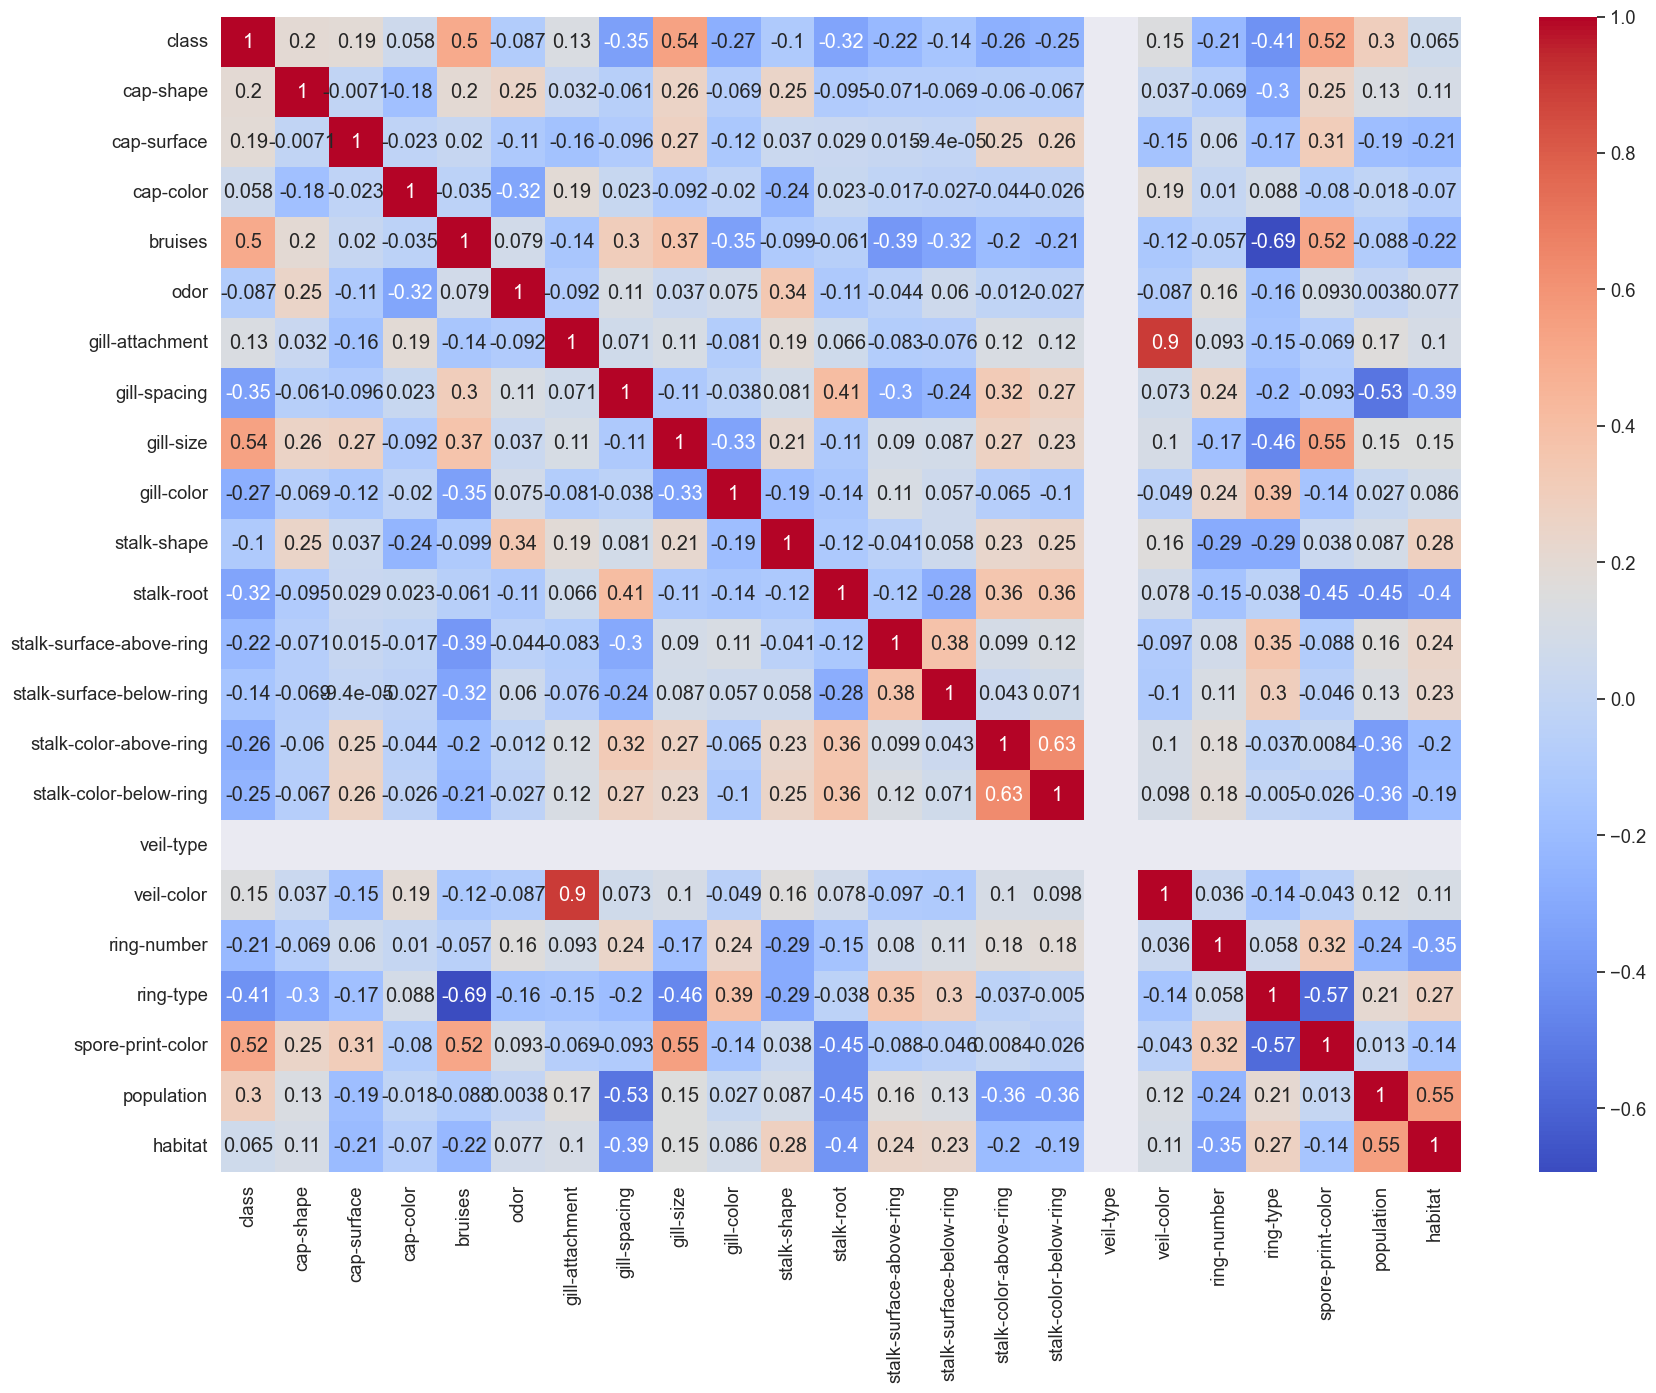

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the correlation matrix for categorical variables
corr_matrix_categorical = df.select_dtypes(include=['object']).apply(lambda x: x.astype('category').cat.codes).corr()

# Set the size of the figure and adjust font size for annotations
plt.figure(figsize=(20, 15))  # Increased size of the figure
sns.set(font_scale=1.2)  # Adjust font size for annotations

# Create a heatmap for categorical variables
sns.heatmap(corr_matrix_categorical, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [22]:

# Exclude 'veil_type' from the DataFrame before calculating the correlation matrix
df_exclude_veil_type = df.select_dtypes(include=['object']).drop('veil-type', axis=1)
corr_matrix_categorical = df_exclude_veil_type.apply(lambda x: x.astype('category').cat.codes).corr()



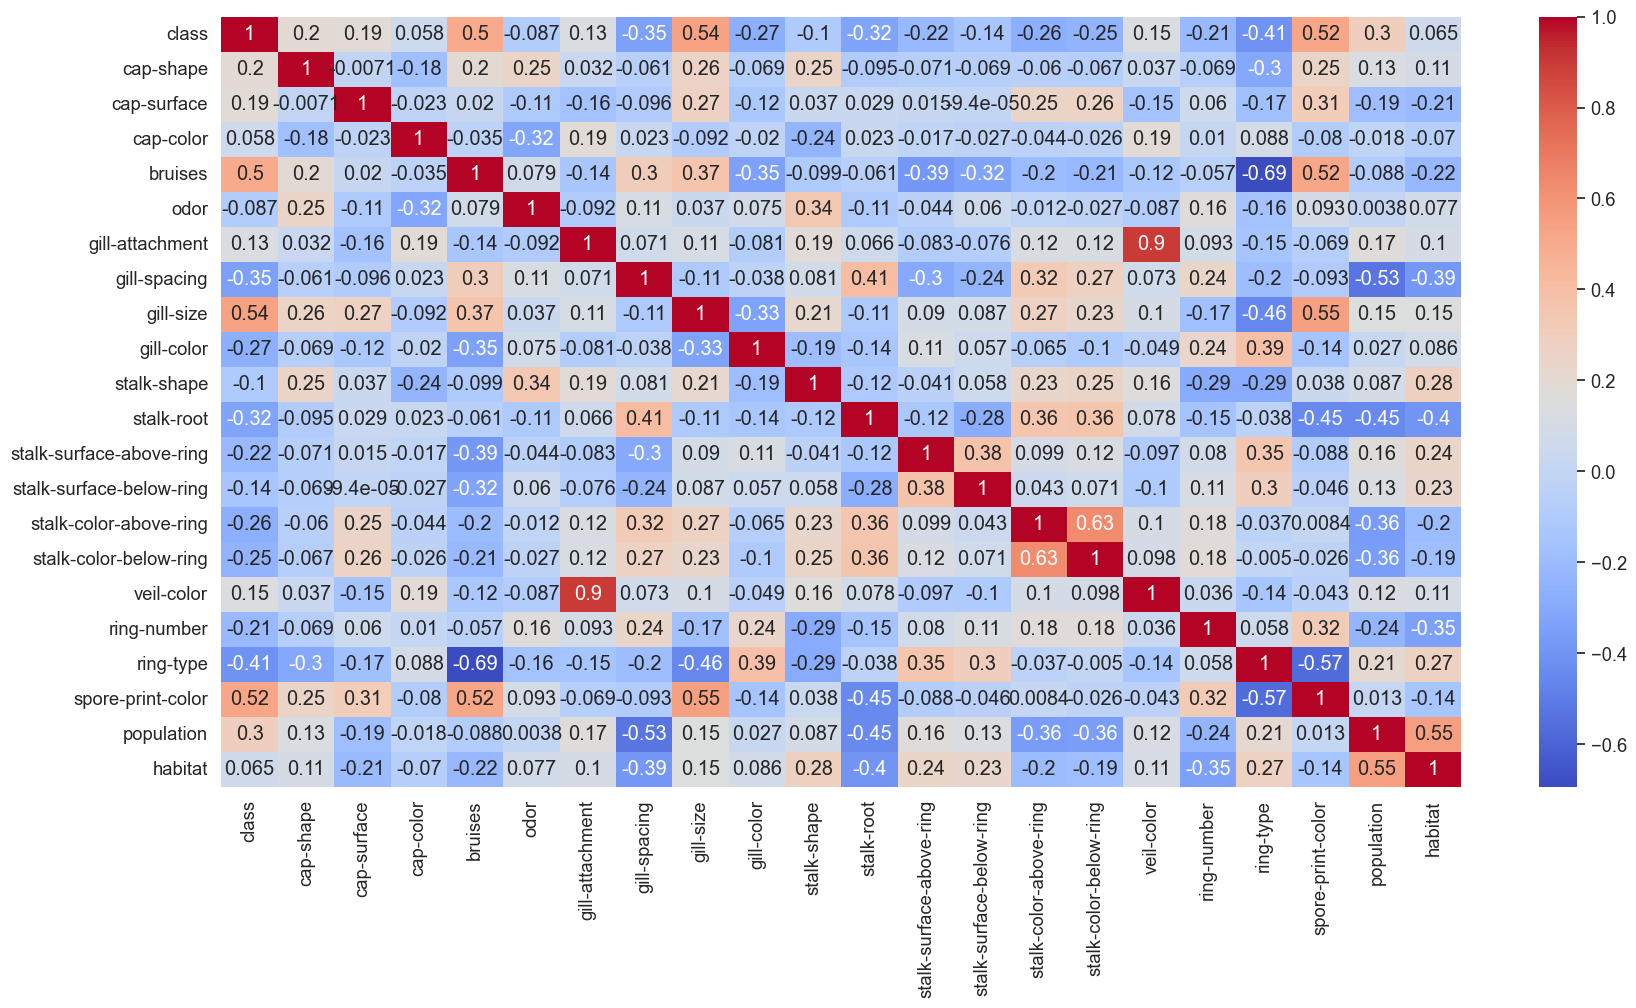

In [23]:
# Set the size of the figure
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# Create a heatmap for categorical variables
sns.heatmap(corr_matrix_categorical, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency



# Create an empty dictionary to store results
chi2_results = {}

# Iterate over all combinations of columns
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:  # Exclude the same column
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Perform chi-square test for independence
            chi2, p, _, _ = chi2_contingency(contingency_table)
            # Store the results
            chi2_results[(col1, col2)] = {'Chi-square': chi2, 'P-value': p}

# Convert the dictionary to a DataFrame for easier viewing
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index')

# Filter the DataFrame to display rows where the P-value is very close to 0
close_to_zero_p_values = chi2_results_df[chi2_results_df['P-value'] < 0.0001]
print(close_to_zero_p_values)


                            Chi-square        P-value
class   cap-shape           489.919954  1.196457e-103
        cap-surface         315.042831   5.518427e-68
        cap-color           387.597769   6.055815e-78
        bruises            2041.415647   0.000000e+00
        odor               7659.726740   0.000000e+00
...                                ...            ...
habitat veil-color         1750.877970   0.000000e+00
        ring-number         742.978143  3.703463e-153
        ring-type          2625.425215   0.000000e+00
        spore-print-color  4707.545326   0.000000e+00
        population         6173.997295   0.000000e+00

[460 rows x 2 columns]


In [26]:

df = df.drop('veil-type', axis=1)
df.reset_index(drop=True, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Column Distribution

Below, you can tell that foul odour and that gill-color that has the value of 'buff' are mostly poisonous.

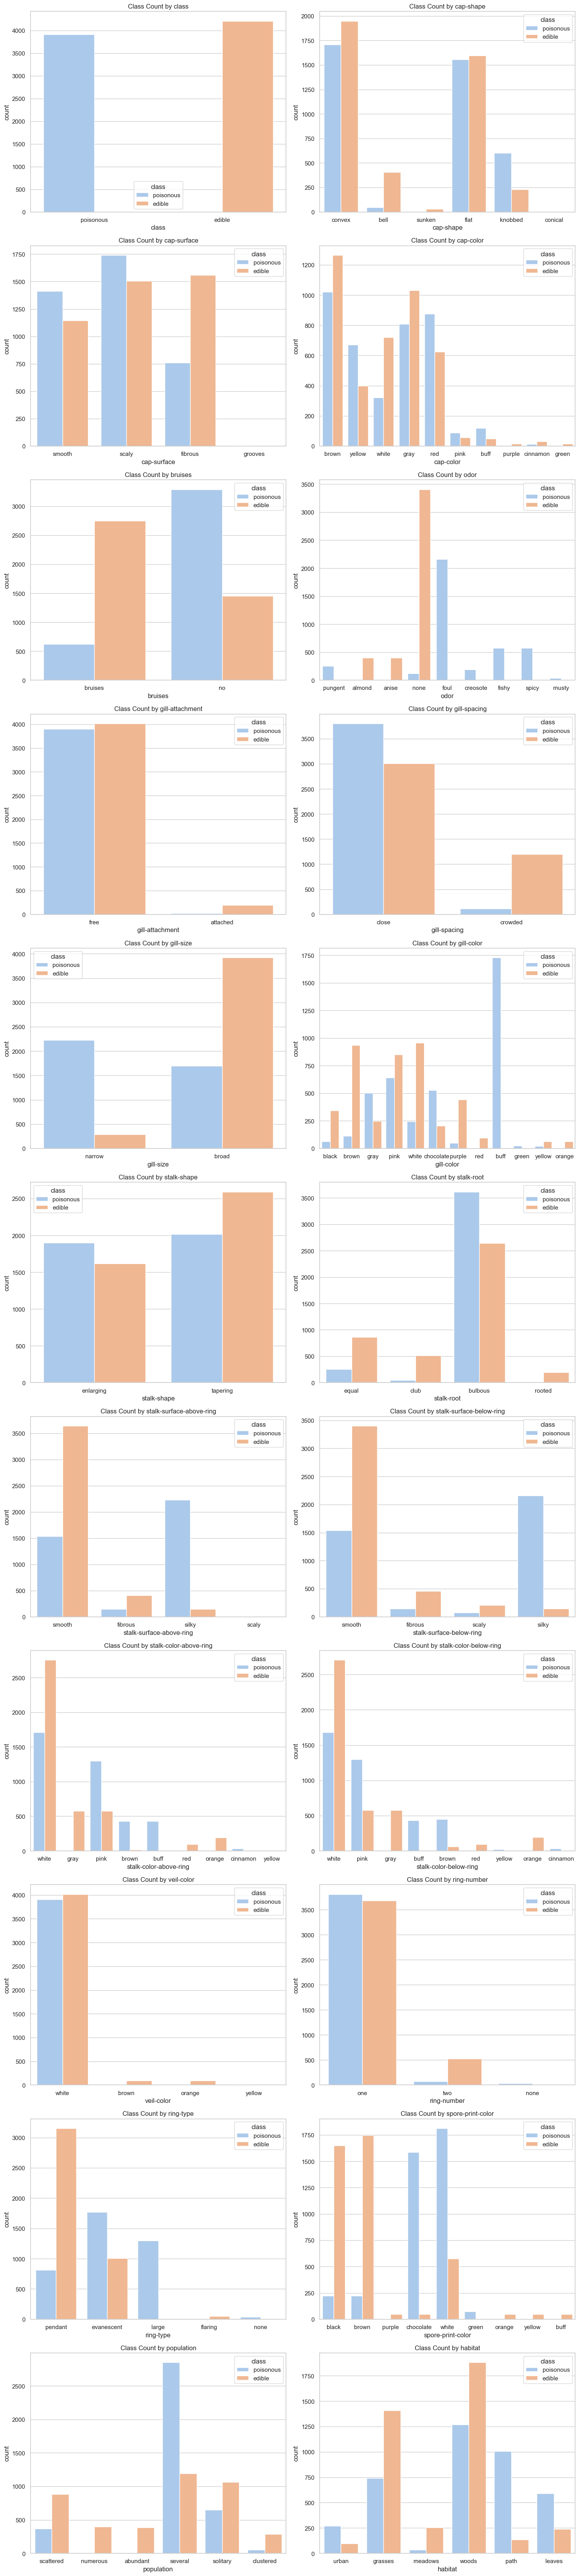

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt



# Get the list of categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Set the style
sns.set(style="whitegrid")

# Calculate the number of rows needed
num_rows = (len(categorical_columns) // 2) + int(len(categorical_columns) % 2 > 0)

# Create subplots with two plots per row
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 6 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue="class", data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Class Count by {column}")

# Hide empty subplots if any
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


To enhance readability, I've segmented the distribution visualizations into three categories: those related to gill characteristics, cap characteristics, and stalk characteristics

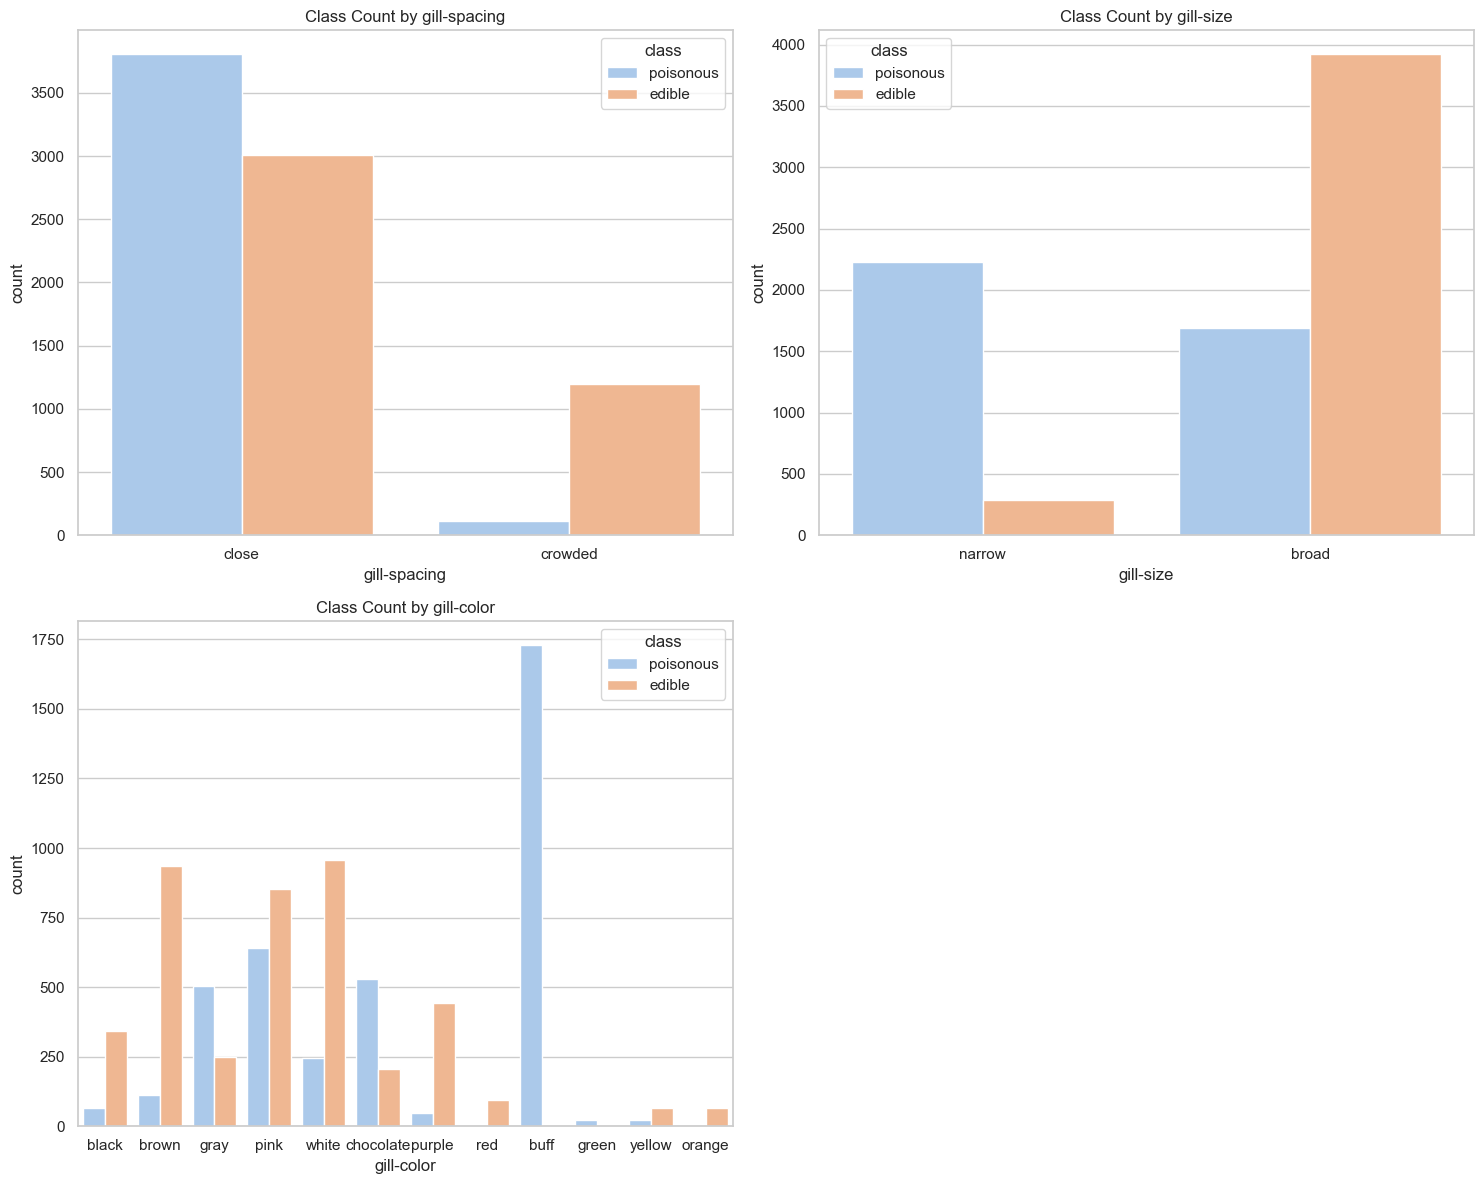

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt



# Group 1: gill-spacing, gill-size, gill-color
group1_columns = ['gill-spacing', 'gill-size', 'gill-color']

# Set the style
sns.set(style="whitegrid")

# Create subplots for Group 1 with two plots per row
fig, axes = plt.subplots(nrows=len(group1_columns)//2 + len(group1_columns)%2, ncols=2, figsize=(15, 6 * (len(group1_columns)//2 + len(group1_columns)%2)))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through Group 1 columns and create count plots
for i, column in enumerate(group1_columns):
    sns.countplot(x=column, hue="class", data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Class Count by {column}")

# Hide empty subplots if any
for j in range(len(group1_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


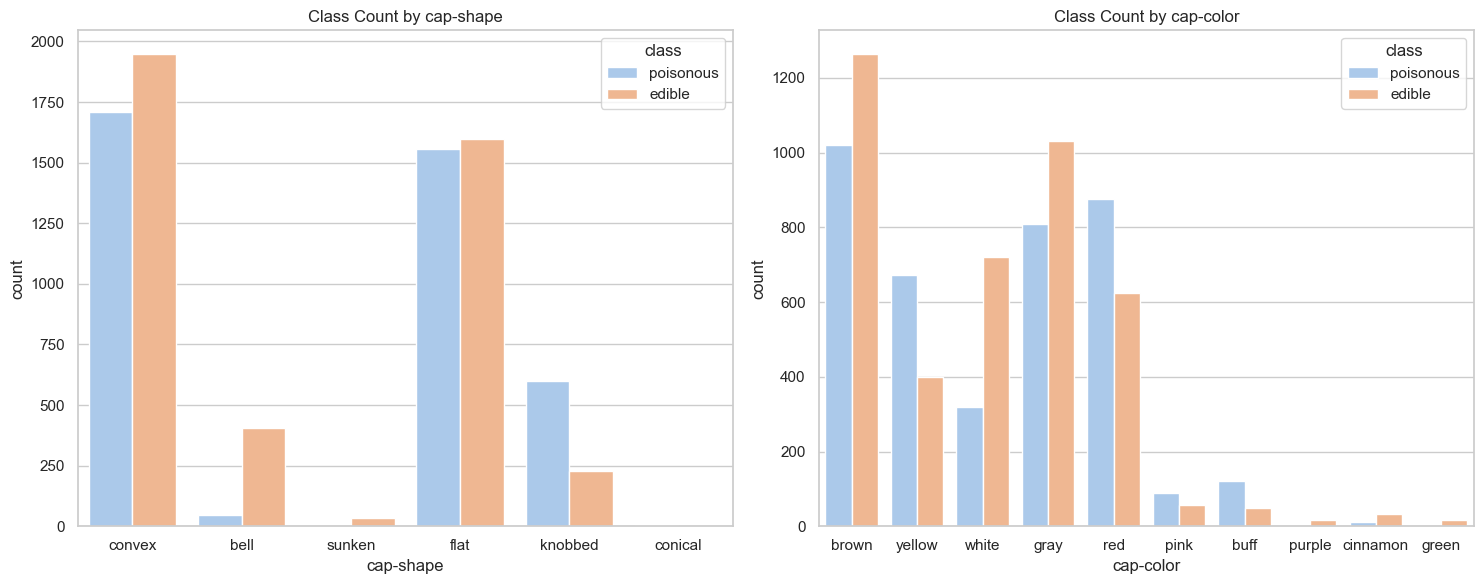

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt



# Group 2: cap-shape, cap-color
group2_columns = ['cap-shape', 'cap-color']

# Set the style
sns.set(style="whitegrid")

# Create subplots for Group 2 with two plots per row
fig, axes = plt.subplots(nrows=len(group2_columns)//2 + len(group2_columns)%2, ncols=2, figsize=(15, 6 * (len(group2_columns)//2 + len(group2_columns)%2)))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through Group 2 columns and create count plots
for i, column in enumerate(group2_columns):
    sns.countplot(x=column, hue="class", data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Class Count by {column}")

# Hide empty subplots if any
for j in range(len(group2_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


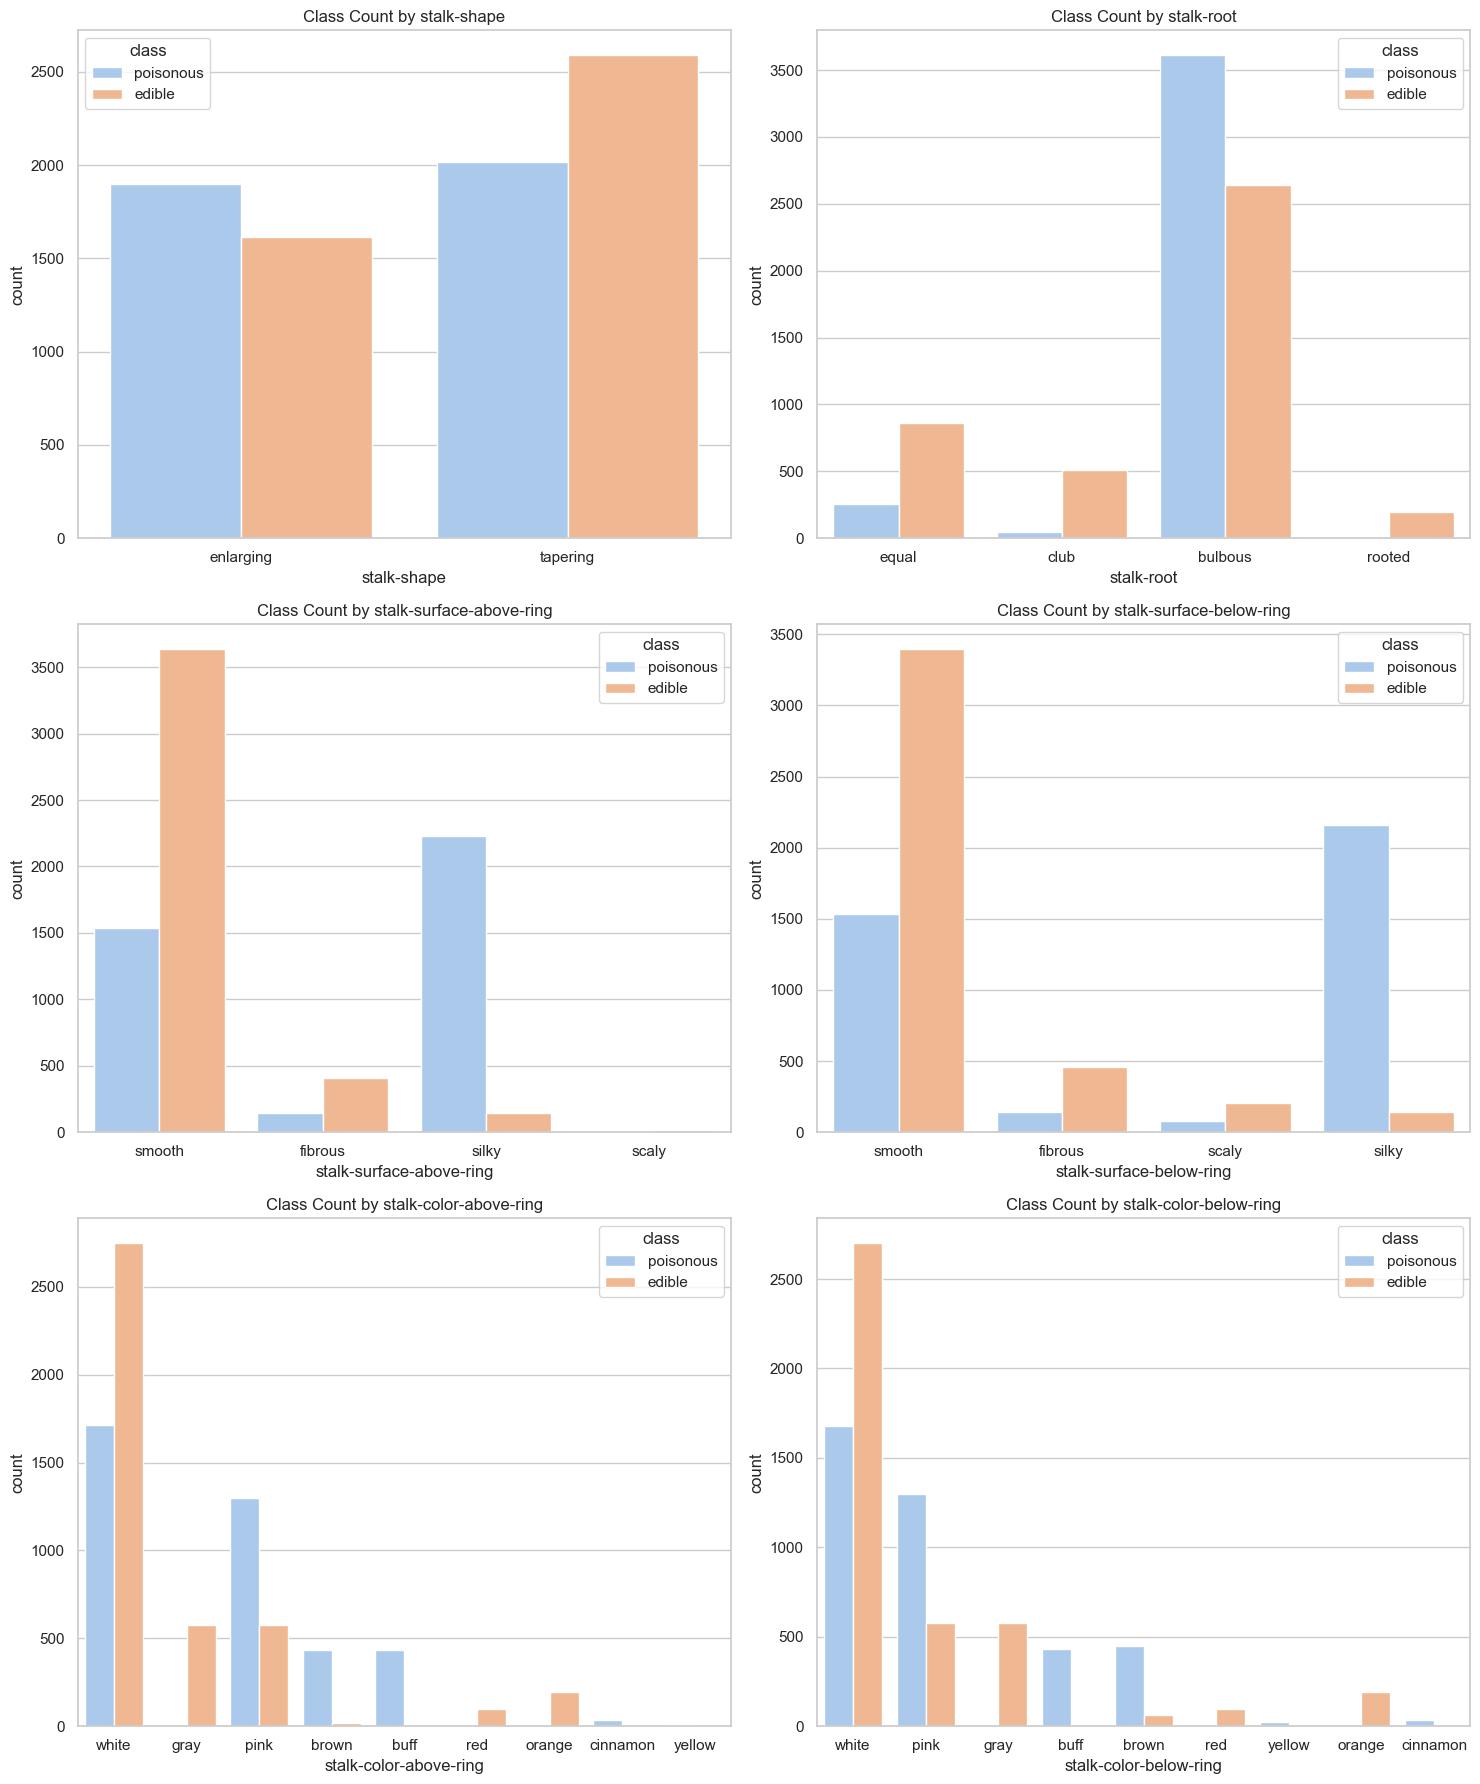

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group 3: stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring
group3_columns = ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']

# Set the style
sns.set(style="whitegrid")

# Create subplots for Group 3 with two plots per row
fig, axes = plt.subplots(nrows=len(group3_columns)//2 + len(group3_columns)%2, ncols=2, figsize=(15, 6 * (len(group3_columns)//2 + len(group3_columns)%2)))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through Group 3 columns and create count plots
for i, column in enumerate(group3_columns):
    sns.countplot(x=column, hue="class", data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Class Count by {column}")

# Hide empty subplots if any
for j in range(len(group3_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


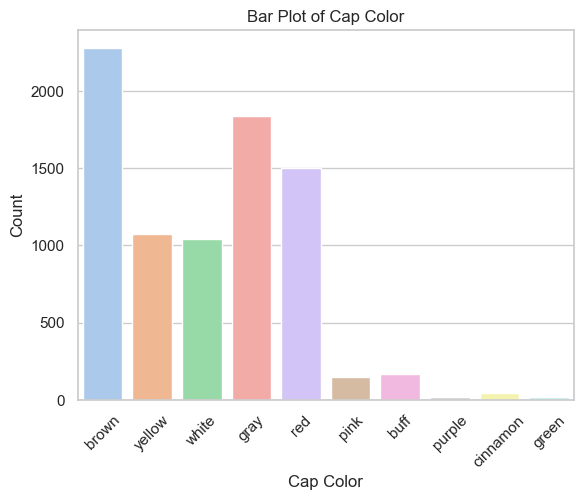

In [33]:
# Example for bar plot of 'cap-color'
sns.countplot(x='cap-color', data=df, palette='pastel')
plt.title('Bar Plot of Cap Color')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


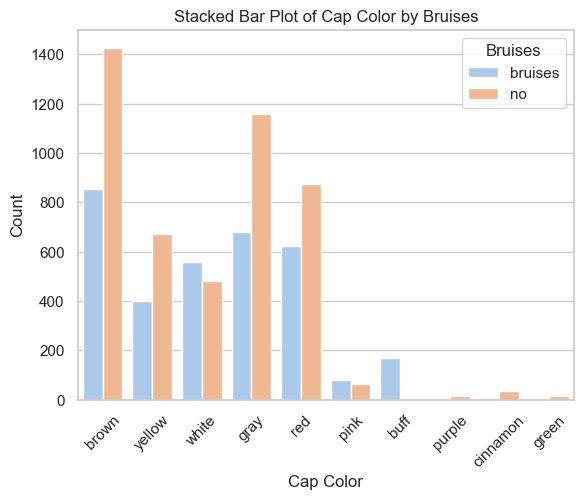

In [34]:
# Example for stacked bar plot of 'cap-color' by 'bruises'
sns.countplot(x='cap-color', hue='bruises', data=df, palette='pastel')
plt.title('Stacked Bar Plot of Cap Color by Bruises')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Bruises')
plt.show()


# Visualisations excluding Target Column

Based on the heatmap below, mushroom that are bruise and odourless takes up more records in my dataset followed by those without bruise and has a foul smell.

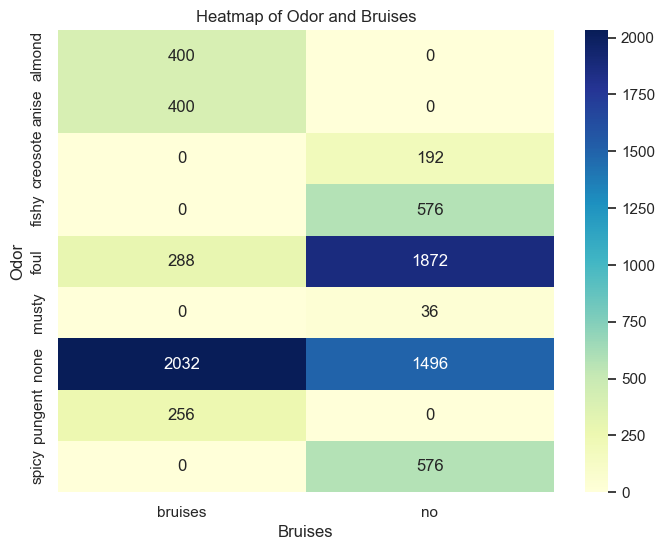

In [35]:
# Example for heatmap of 'odor' and 'bruises'
cross_tab = pd.crosstab(df['odor'], df['bruises'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Odor and Bruises')
plt.xlabel('Bruises')
plt.ylabel('Odor')
plt.show()


There are fewer instances of mushrooms with narrow gill size and bruised color compared to other combinations. 

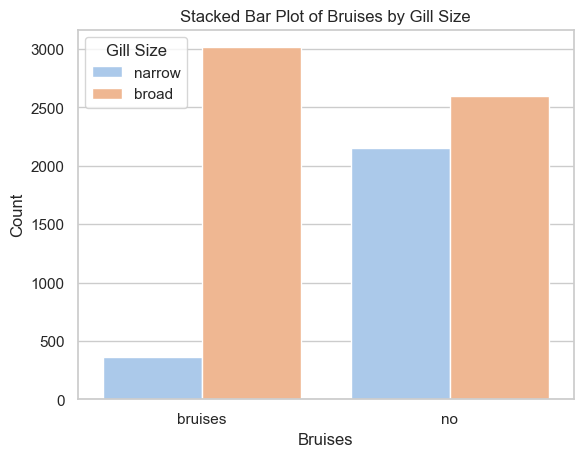

In [37]:
# Example for stacked bar plot of 'bruises' by 'gill-size'
sns.countplot(x='bruises', hue='gill-size', data=df, palette='pastel')
plt.title('Stacked Bar Plot of Bruises by Gill Size')
plt.xlabel('Bruises')
plt.ylabel('Count')
plt.legend(title='Gill Size')
plt.show()


Let's examine the distribution excluding the 'bruises' column. From this, it becomes evident that narrow gill sizes, particularly those with a buff color, are the most common in my dataset.

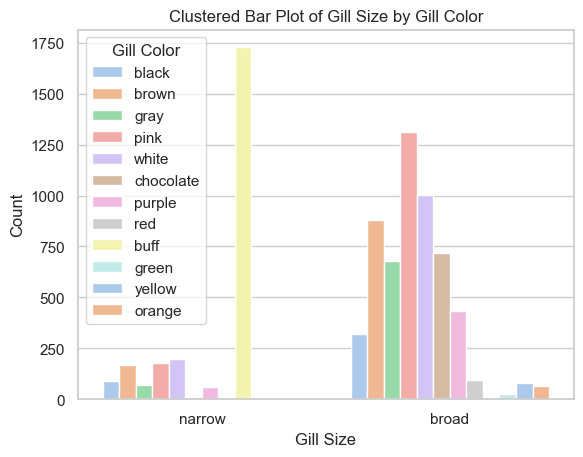

In [38]:
# Example for clustered bar plot of 'gill-size' and 'gill-color'
sns.countplot(x='gill-size', hue='gill-color', data=df, palette='pastel')
plt.title('Clustered Bar Plot of Gill Size by Gill Color')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.legend(title='Gill Color')
plt.show()


Mushrooms are typically found in various populations.

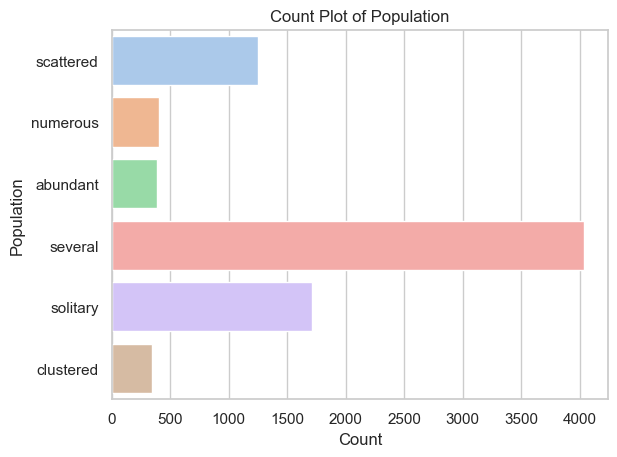

In [39]:
# Example for count plot of 'population'
sns.countplot(y='population', data=df, palette='pastel')
plt.title('Count Plot of Population')
plt.xlabel('Count')
plt.ylabel('Population')
plt.show()


In [43]:
from pycaret.classification import *

# Perform setup without dropping columns
clf_setup = setup(data=df, target='class',session_id=123, feature_selection=True, fix_imbalance=True,log_experiment=True, experiment_name='mushroom')



class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [44]:
print(df.dtypes)


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [45]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [47]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

# Filling NA with Mode
Imputing the habitat column with the mode is the optimal choice since all variables in my dataset are categorical.

In [48]:
mode_habitat = df['habitat'].mode()[0]
df['habitat'].fillna(mode_habitat, inplace=True)

# Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target. All the other parameters are optional.


In [49]:
# Save the experiment
exp.save_experiment('my_ass_experiment')

# Load the experiment from disk
exp_from_disk = load_experiment('my_ass_experiment', data=df)

In [50]:
from pycaret.classification import *

# Run setup
clf_setup = setup(data=df, target='class', session_id=123, feature_selection=True, fix_imbalance=True, log_experiment=True, experiment_name='mushroom')



# Compare Models
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function

In [ ]:
# Compare models
best_model = compare_models()

# Analyze Model
You can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

Summary of a binary classification model's performance metrics:

True Positives (TP): 987

False Positives (FP): 379

True Negatives (TN): 884

False Negatives (FN): 188
   

The model correctly identified 987 instances as positive cases.
It incorrectly classified 379 instances as positive when they were actually negative.

It correctly identified 884 instances as negative cases.
However, it missed 188 instances that were actually positive but were classified as negative.

Overall, this information provides insight into how well the model is performing. 

[TN FP  
FN TP]

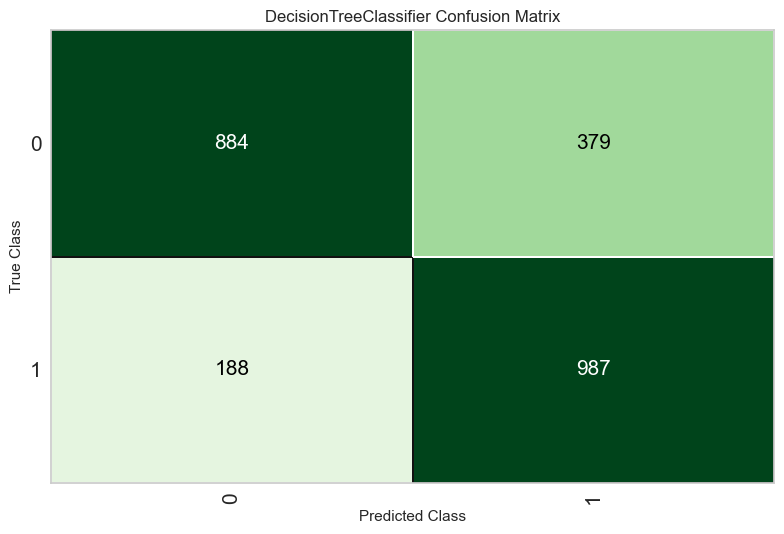

In [51]:
# plot confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

To access the performance of the model, let us calculate these metrics:
   
Accuracy: Accuracy = (TP + TN) / (TP + FP + TN + FN)

Precision : Precision = TP / (TP + FP)

Recall(Sensitivity or True Positive Rate): Recall = TP / (TP + FN)

F1-score: F1-score = 2 * (Precision * Recall) / (Precision + Recall)

Let's calculate these metrics:

Accuracy = (987 + 884) / (987 + 379 + 884 + 188) ≈ (1871) / (2438) ≈ 0.767

Precision = 987 / (987 + 379) ≈ (987) / (1366) ≈ 0.722

Recall = 987 / (987 + 188) ≈ (987) / (1175) ≈ 0.839

F1-score = 2 * (0.722 * 0.839) / (0.722 + 0.839) ≈ 2 * (0.607) / (1.561) ≈ 0.777

Based on these metrics:

The model has an accuracy of approximately 76.7%, indicating the overall correctness of the predictions.
Precision tells us that around 72.2% of the instances predicted as positive are indeed positive.
Recall suggests that the model captures around 83.9% of the actual positive instances.

The F1-score, which considers both precision and recall, is approximately 77.7%, providing a balanced assessment of the model's performance.
Overall, the model shows reasonably good performance, with room for potential improvements depending on the specific requirements of the application.



These ROC (Receiver Operating Characteristic) curve metrics provide insight into the performance of a binary classification model, specifically in terms of its ability to discriminate between the positive and negative classes.

For each individual class (Class 0 and Class 1), the ROC curves and corresponding AUC values indicate that the model performs relatively well in distinguishing between positive and negative instances, with an AUC value of 0.78 for both classes.

The micro-average ROC curve and AUC consider all classes collectively, showing that the model performs slightly better in discriminating between positive and negative instances when considering all instances together, with an AUC of 0.80.

The macro-average ROC curve and AUC calculate the average AUC value across all classes, indicating that, on average, the model's performance in discriminating between positive and negative instances across different classes is consistent, with an AUC of 0.78.


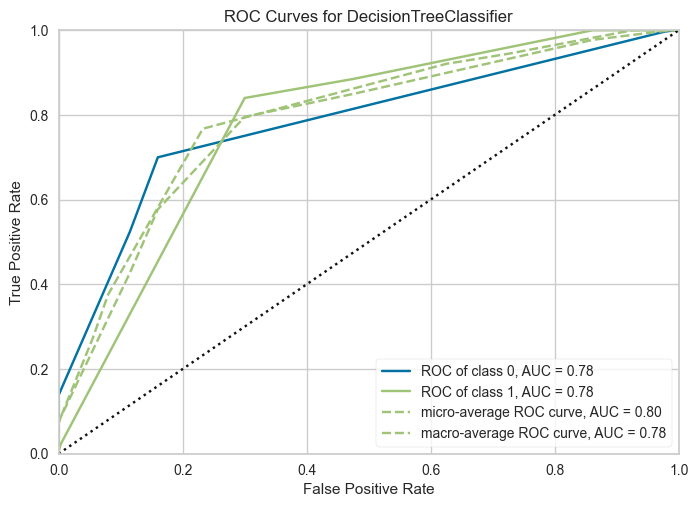

In [52]:
# plot AUC
plot_model(best_model, plot = 'auc')

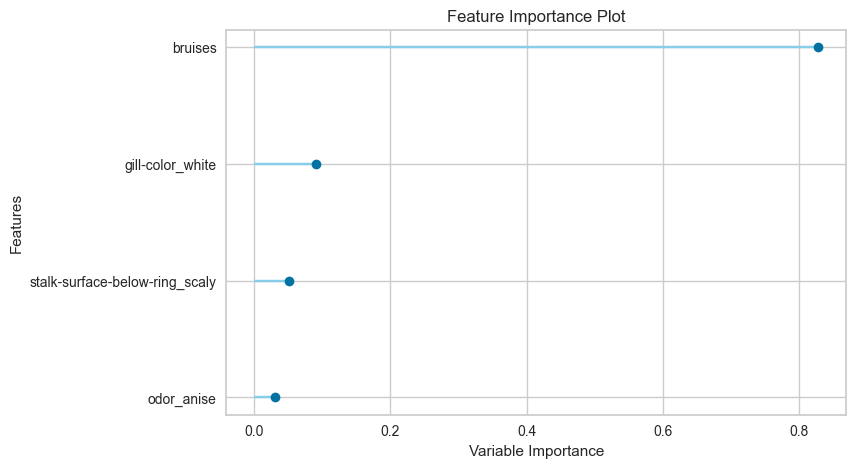

In [53]:
# plot feature importance
plot_model(best_model, plot = 'feature')

An alternate to plot_model function is evaluate_model. It can only be used in Notebook since it uses ipywidget.

In [54]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [55]:
# check the final params of best model
best_model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

# Prediction
The predict_model function returns prediction_label and prediction_score (probability of the predicted class) as new columns in dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring.

In [56]:
# predict on test set
holdout_pred = predict_model(best_model)

In [57]:
# show predictions df
holdout_pred.head()

cap-shape cap-surface cap-color  bruises  odor gill-attachment  \
3370      flat       scaly     brown  bruises  none            free   
4466      flat     fibrous      gray       no  foul            free   
4232      flat      smooth     white  bruises  foul            free   
5058    convex      smooth      buff  bruises  foul            free   
6305    convex      smooth       red       no  foul            free   

     gill-spacing gill-size gill-color stalk-shape  ...  \
3370        close     broad      white    tapering  ...   
4466        close     broad  chocolate   enlarging  ...   
4232        close     broad       pink    tapering  ...   
5058        close     broad      white    tapering  ...   
6305        close    narrow       buff    tapering  ...   

     stalk-color-below-ring veil-color ring-number   ring-type  \
3370                   gray      white         one     pendant   
4466                   pink      white         one       large   
4232                  white      white         one     pendant   
5058                  white      white         one     pendant   
6305                   pink      white         one  evanescent   

     spore-print-color population  habitat      class prediction_label  \
3370             black    several    woods     edible           edible   
4466         chocolate   solitary  grasses  poisonous        poisonous   
4232         chocolate  scattered    urban  poisonous           edible   
5058         chocolate  scattered    urban  poisonous           edible   
6305             white    several     path  poisonous        poisonous   

     prediction_score  
3370           0.7451  
4466           0.7273  
4232           0.7792  
5058           0.7451  
6305           0.7273  

[5 rows x 24 columns]

The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the Class variable. We can then use the new data frame without labels for scoring

In [58]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

cap-shape cap-surface cap-color  bruises     odor gill-attachment  \
0    convex      smooth     brown  bruises  pungent            free   
1    convex      smooth    yellow  bruises   almond            free   
2      bell      smooth     white  bruises    anise            free   
3    convex       scaly     white  bruises  pungent            free   
4    convex      smooth      gray       no     none            free   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-surface-above-ring  \
0        close    narrow      black   enlarging  ...                   smooth   
1        close     broad      black   enlarging  ...                   smooth   
2        close     broad      brown   enlarging  ...                   smooth   
3        close    narrow      brown   enlarging  ...                   smooth   
4      crowded     broad      black    tapering  ...                   smooth   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2                   smooth                  white                  white   
3                   smooth                  white                  white   
4                   smooth                  white                  white   

  veil-color ring-number   ring-type spore-print-color population  habitat  
0      white         one     pendant             black  scattered    urban  
1      white         one     pendant             brown   numerous  grasses  
2      white         one     pendant             brown   numerous  meadows  
3      white         one     pendant             black  scattered    urban  
4      white         one  evanescent             brown   abundant  grasses  

[5 rows x 21 columns]

In [59]:
# predict model on new_data
predictions = predict_model(best_model, data = new_data)
predictions.head()

cap-shape cap-surface cap-color  bruises     odor gill-attachment  \
0    convex      smooth     brown  bruises  pungent            free   
1    convex      smooth    yellow  bruises   almond            free   
2      bell      smooth     white  bruises    anise            free   
3    convex       scaly     white  bruises  pungent            free   
4    convex      smooth      gray       no     none            free   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0        close    narrow      black   enlarging  ...                  white   
1        close     broad      black   enlarging  ...                  white   
2        close     broad      brown   enlarging  ...                  white   
3        close    narrow      brown   enlarging  ...                  white   
4      crowded     broad      black    tapering  ...                  white   

  stalk-color-below-ring veil-color ring-number   ring-type spore-print-color  \
0                  white      white         one     pendant             black   
1                  white      white         one     pendant             brown   
2                  white      white         one     pendant             brown   
3                  white      white         one     pendant             black   
4                  white      white         one  evanescent             brown   

  population  habitat prediction_label prediction_score  
0  scattered    urban           edible           0.7792  
1   numerous  grasses           edible           0.7792  
2   numerous  meadows           edible           1.0000  
3  scattered    urban           edible           0.7792  
4   abundant  grasses        poisonous           0.7273  

[5 rows x 23 columns]

# Save Model
Finally, you can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [60]:
# save pipeline
save_model(best_model, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
  

In [61]:
# load pipeline
loaded_best_pipeline = load_model('my_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\MYPC\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)

In [62]:
print(loaded_best_pipeline)

Pipeline(memory=FastMemory(location=C:\Users\MYPC\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                  

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use get_config method.

In [63]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [64]:
# lets access X_train_transformed
get_config('X_train_transformed')

bruises  odor_anise  gill-color_white  stalk-surface-below-ring_scaly
1287      1.0         0.0               0.0                             0.0
6411      1.0         0.0               0.0                             0.0
4564      1.0         0.0               0.0                             0.0
3565      1.0         0.0               0.0                             0.0
3892      1.0         0.0               0.0                             0.0
...       ...         ...               ...                             ...
8323      1.0         0.0               0.0                             0.0
8324      1.0         0.0               0.0                             0.0
8325      1.0         0.0               0.0                             0.0
8326      1.0         0.0               0.0                             0.0
8327      1.0         0.0               0.0                             0.0

[5890 rows x 4 columns]

In [65]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the setup function.

In [66]:
# init setup with normalize = True

s = setup(df, target = 'class', session_id = 123,
          normalize = True, normalize_method = 'minmax')

In [67]:
best = compare_models()

In [68]:
# check available models
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [69]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'lightgbm', 'catboost'])

In [70]:
compare_tree_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [71]:
compare_tree_models_results = pull()
compare_tree_models_results

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    0.9998  0.9998  0.9998  0.9998   
catboost              CatBoost Classifier    0.9998  1.0000  0.9998  0.9998   
gbc          Gradient Boosting Classifier    0.9996  1.0000  0.9996  0.9996   

              F1   Kappa     MCC  TT (Sec)  
rf        1.0000  1.0000  1.0000     0.595  
et        1.0000  1.0000  1.0000     0.553  
lightgbm  1.0000  1.0000  1.0000     0.507  
dt        0.9998  0.9996  0.9996     0.695  
catboost  0.9998  0.9996  0.9996     2.536  
gbc       0.9996  0.9993  0.9993     0.984

In [72]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

In [73]:
# list of top 3 models by Recall
best_recall_models_top3

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001)]

In [74]:
# check available metrics used in CV
get_metrics()

Name Display Name  \
ID                                  
acc         Accuracy     Accuracy   
auc              AUC          AUC   
recall        Recall       Recall   
precision  Precision        Prec.   
f1                F1           F1   
kappa          Kappa        Kappa   
mcc              MCC          MCC   

                                              Score Function  \
ID                                                             
acc          <function accuracy_score at 0x0000028DE0F82D40>   
auc        <pycaret.internal.metrics.BinaryMulticlassScor...   
recall     <pycaret.internal.metrics.BinaryMulticlassScor...   
precision  <pycaret.internal.metrics.BinaryMulticlassScor...   
f1         <pycaret.internal.metrics.BinaryMulticlassScor...   
kappa      <function cohen_kappa_score at 0x0000028DE0F82...   
mcc        <function matthews_corrcoef at 0x0000028DE0F82...   

                                                      Scorer      Target  \
ID                                                                         
acc                                                 accuracy        pred   
auc        make_scorer(roc_auc_score, needs_proba=True, e...  pred_proba   
recall           make_scorer(recall_score, average=weighted)        pred   
precision     make_scorer(precision_score, average=weighted)        pred   
f1                   make_scorer(f1_score, average=weighted)        pred   
kappa                         make_scorer(cohen_kappa_score)        pred   
mcc                           make_scorer(matthews_corrcoef)        pred   

                                                    Args  Greater is Better  \
ID                                                                            
acc                                                   {}               True   
auc        {'average': 'weighted', 'multi_class': 'ovr'}               True   
recall                           {'average': 'weighted'}               True   
precision                        {'average': 'weighted'}               True   
f1                               {'average': 'weighted'}               True   
kappa                                                 {}               True   
mcc                                                   {}               True   

           Multiclass  Custom  
ID                             
acc              True   False  
auc              True   False  
recall           True   False  
precision        True   False  
f1               True   False  
kappa            True   False  
mcc              True   False

In [75]:
# create a custom function
import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('custom_metric', 'Custom Metric', custom_metric)

Name                                                     Custom Metric
Display Name                                             Custom Metric
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer                                      make_scorer(custom_metric)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: custom_metric, dtype: object

In [76]:
# now let's run compare_models again
compare_models()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
# remove custom metric
remove_metric('custom_metric')

In [78]:
# check all the available models
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

# Tune Model
This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [79]:

dt = create_model('dt')

In [80]:
# Define hyperparameter grid
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Tune model with custom grid and optimize for F1 score
tuned_dt = tune_model(dt, custom_grid=param_grid, optimize='F1')


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [81]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [82]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [83]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [84]:
tuned_dt, tuner = tune_model(dt, return_tuner=True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [85]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [86]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=[],
                                                                 transformer=SimpleImputer(add...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [87]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

[I 2024-02-23 04:37:04,720] Searching the best hyperparameters using 5686 samples...
[I 2024-02-23 04:38:21,527] Finished hyperparameter search!


# Ensemble Model
This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [88]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [89]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

# Blend Models
This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [90]:
# top 3 models based on recall
best_recall_models_top3

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001)]

In [91]:
# blend top 3 models
blend_models(best_recall_models_top3)

VotingClassifier(estimators=[('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('Random Forest Classifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nod...
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False)),
                             ('Quadratic Discriminant Analysis',
                              QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

# Stack Models
This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [92]:
# stack models
stack_models(best_recall_models_top3)

StackingClassifier(cv=5,
                   estimators=[('K Neighbors Classifier',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=-1, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_l...
                                                              reg_param=0.0,
                                                              store_covariance=False,
                                                              tol=0.0001))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

# Plot Model
This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

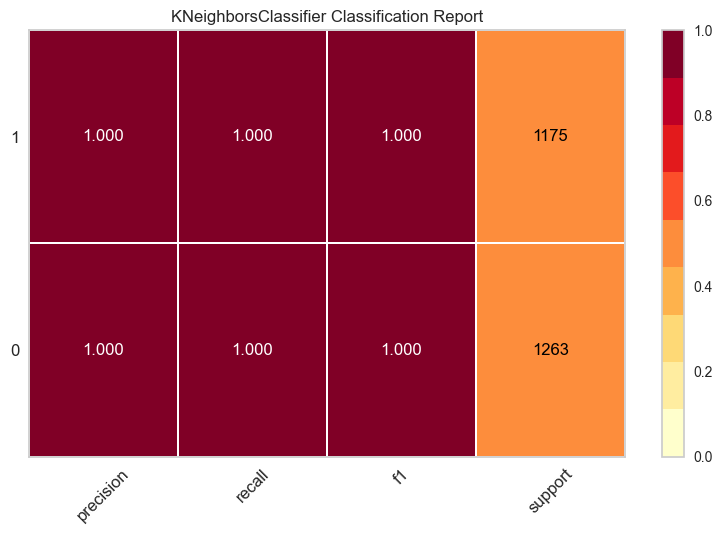

In [93]:
# plot class report
plot_model(best, plot = 'class_report')

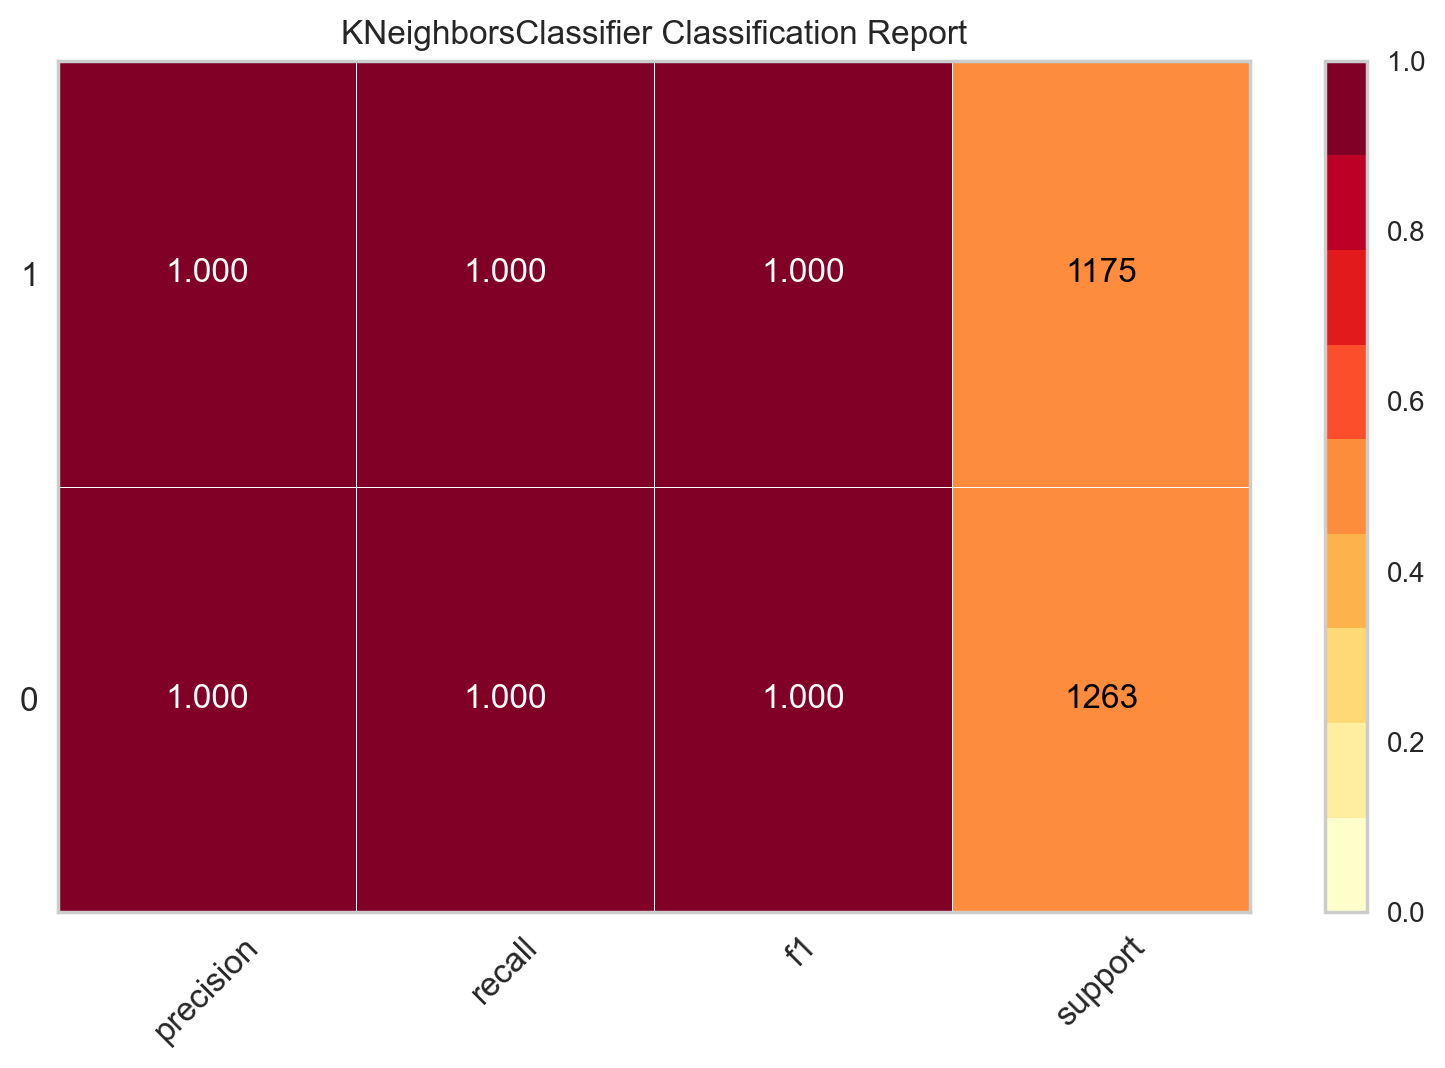

In [94]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [95]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)


'Class Report.png'

# Interpret Model
This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). 

In [96]:
# train lightgbm model
lightgbm = create_model('lightgbm')

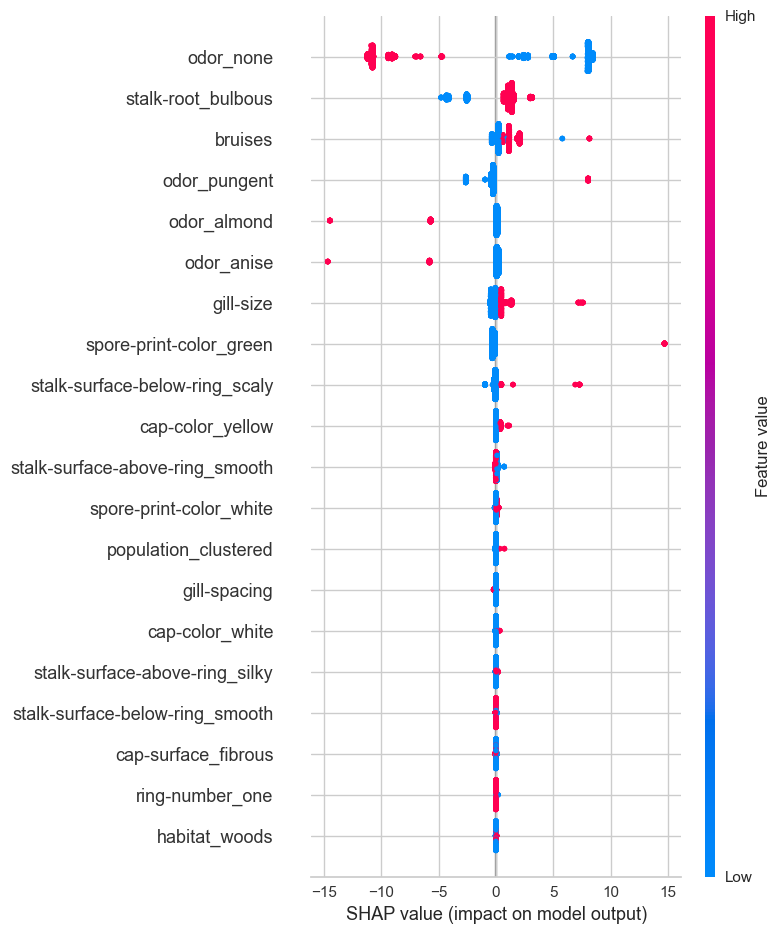

In [97]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [98]:
# reason plot for test set observation 1

interpret_model(lightgbm, plot = 'reason', observation = 1)

# Calibrate Model
This function calibrates the probability of a given model using isotonic or logistic regression. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function

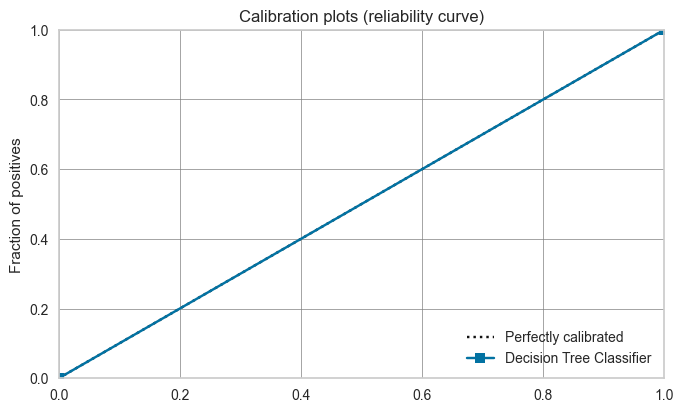

In [99]:
# check calbiration of default dt
plot_model(dt, plot = 'calibration')

In [100]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

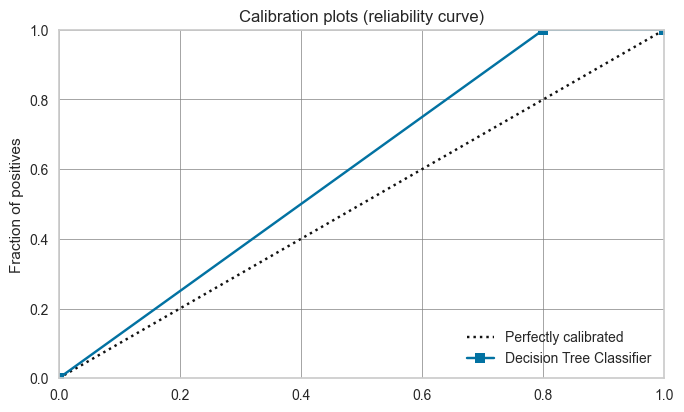

In [101]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot = 'calibration')

# Get Leaderboard
This function returns the leaderboard of all models trained in the current setup.

In [102]:
# get leaderboard
lb = get_leaderboard()
lb

Model Name  \
Index                                    
0                  Logistic Regression   
1               K Neighbors Classifier   
2                          Naive Bayes   
3             Decision Tree Classifier   
4                  SVM - Linear Kernel   
...                                ...   
63                Ada Boost Classifier   
64                   Voting Classifier   
65                 Stacking Classifier   
66     Light Gradient Boosting Machine   
67            Decision Tree Classifier   

                                                   Model  Accuracy     AUC  \
Index                                                                        
0      (TransformerWrapperWithInverse(exclude=None, i...    0.9996  1.0000   
1      (TransformerWrapperWithInverse(exclude=None, i...    1.0000  1.0000   
2      (TransformerWrapperWithInverse(exclude=None, i...    0.9912  0.9982   
3      (TransformerWrapperWithInverse(exclude=None, i...    0.9998  0.9998   
4      (TransformerWrapperWithInverse(exclude=None, i...    0.9998  0.0000   
...                                                  ...       ...     ...   
63     (TransformerWrapperWithInverse(exclude=None, i...    0.9998  0.9998   
64     (TransformerWrapperWithInverse(exclude=None, i...    1.0000  1.0000   
65     (TransformerWrapperWithInverse(exclude=None, i...    1.0000  1.0000   
66     (TransformerWrapperWithInverse(exclude=None, i...    1.0000  1.0000   
67     (TransformerWrapperWithInverse(exclude=None, i...    0.9998  0.9998   

       Recall   Prec.      F1   Kappa     MCC  Custom Metric  
Index                                                         
0      0.9996  0.9996  0.9996  0.9993  0.9993            NaN  
1      1.0000  1.0000  1.0000  1.0000  1.0000            NaN  
2      0.9912  0.9914  0.9912  0.9824  0.9826            NaN  
3      0.9998  0.9998  0.9998  0.9996  0.9996            NaN  
4      0.9998  0.9998  0.9998  0.9996  0.9996            NaN  
...       ...     ...     ...     ...     ...            ...  
63     0.9998  0.9998  0.9998  0.9996  0.9996            NaN  
64     1.0000  1.0000  1.0000  1.0000  1.0000            NaN  
65     1.0000  1.0000  1.0000  1.0000  1.0000            NaN  
66     1.0000  1.0000  1.0000  1.0000  1.0000            NaN  
67     0.9998  0.9998  0.9998  0.9996  0.9996            NaN  

[68 rows x 10 columns]

In [103]:
best_model = lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]


# AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the get_metrics function

In [104]:
automl()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using ExplainerDashboard.

In [105]:
# dashboard function with a different port
dashboard(dt, display_format='inline')


Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_

# Create App
This function creates a basic gradio app for inference

In [106]:
# create gradio app 
create_app(best)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Create API
This function takes an input model and creates a POST API for inference.

In [107]:
# create api
create_api(best_model, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


# Create Docker
This function creates a Dockerfile and requirements.txt for productionalizing API end-point.

In [108]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


# Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [109]:
final_best = finalize_model(best)

In [110]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbo...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [115]:
loaded_model = load_model('my_ass_model')

Transformation Pipeline and Model Successfully Loaded


# Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [116]:

# Save experiment
save_experiment('my_ass_experiment')

In [117]:
# Load experiment from disk
exp_from_disk = load_experiment('my_ass_experiment', data=df)

# Predict on test set
holdout_pred2 = predict_model(best_model)

# Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [118]:
# Show predictions DataFrame
holdout_pred2.head()

# Copy data and drop Class variable
new_data = df.copy()
new_data.drop('class', axis=1, inplace=True)

# Predict model on new_data
predictions = predict_model(best_model, data=new_data)
predictions.head()

# Save model
save_model(best_model, 'my_ass_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                  